<a href="https://colab.research.google.com/github/duongdanghung20/ml-practice/blob/master/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import dependencies

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 30.5 MB/s eta 0:00:00


In [ ]:
import kagglehub
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [ ]:
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Get dataset

In [ ]:
titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')

100%|██████████| 34.1k/34.1k [00:00<00:00, 41.9MB/s]

Extracting files...
Data source import complete.


In [ ]:
os.listdir(titanic_path)

['train.csv', 'gender_submission.csv', 'test.csv']

# Preprocess data

In [ ]:
train_path = os.path.join(titanic_path, 'train.csv')
test_path = os.path.join(titanic_path, 'test.csv')

In [ ]:
df = pd.read_csv(train_path)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


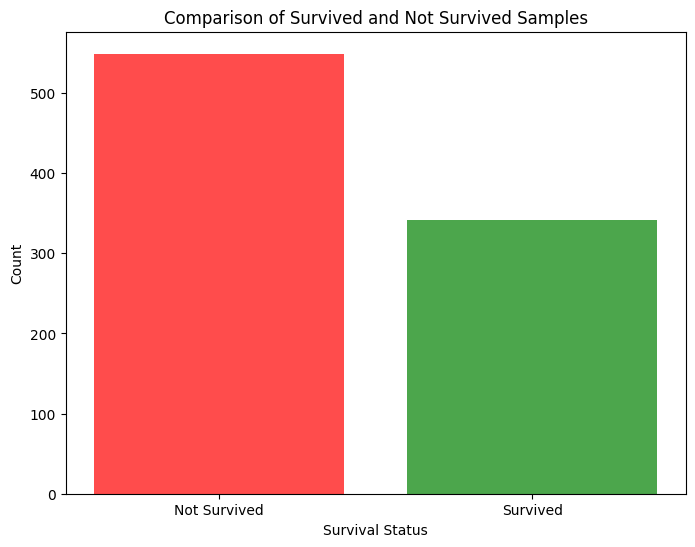

In [ ]:
# Count the occurrences of each survival label
counts = df['Survived'].value_counts()

# Extract data for plotting
labels = ['Not Survived', 'Survived']
values = [counts[0], counts[1]]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['red', 'green'], alpha=0.7)

# Adding labels and title
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Comparison of Survived and Not Survived Samples')

# Display the plot
plt.show()

In [ ]:
df['Cabin'].isna().sum()

687

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df = df.drop(columns=['PassengerId', 'Name','Cabin'])

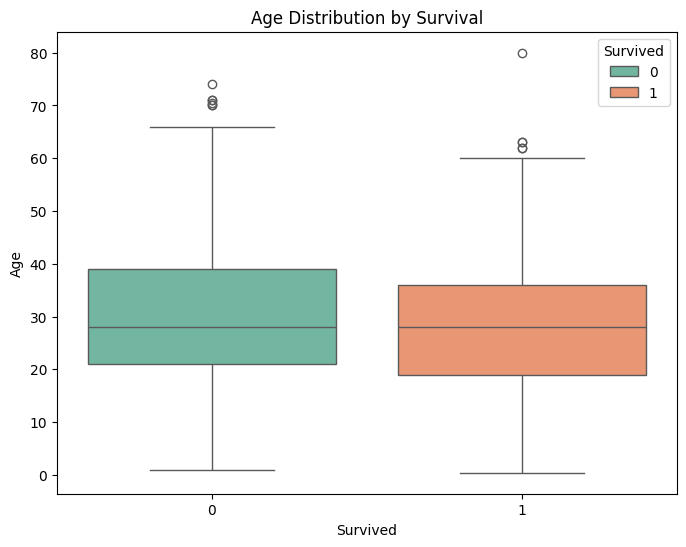

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette="Set2", legend=True, hue='Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution by Survival')
plt.show()

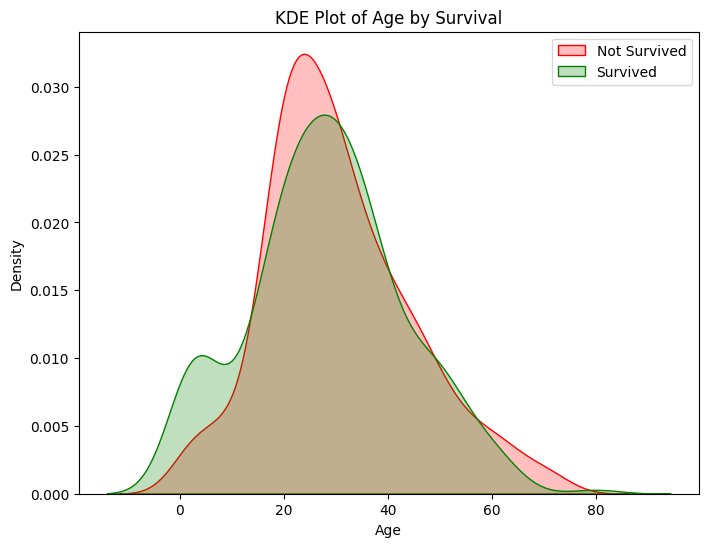

In [ ]:
# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Not Survived', fill=True, color='red')
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', fill=True, color='green')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age by Survival')
plt.legend()
plt.show()

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


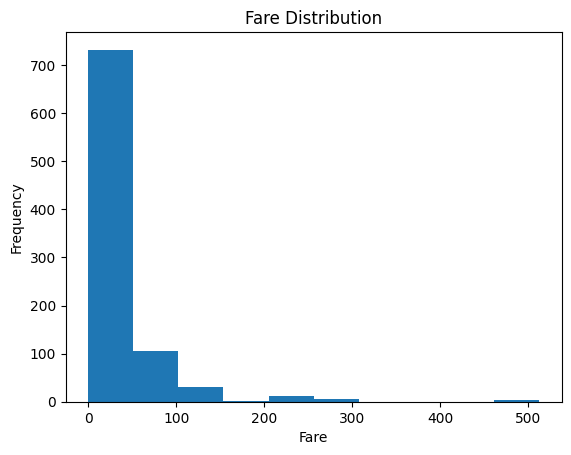

In [ ]:
# Plot histogram of the "Age" column
plt.hist(df['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

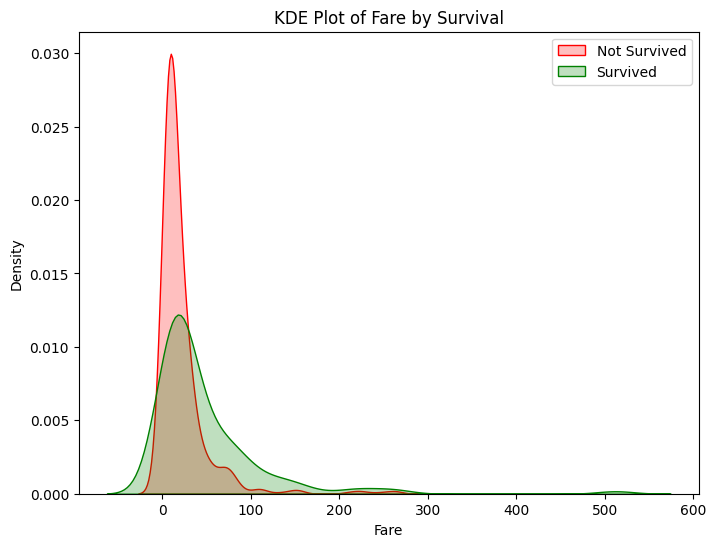

In [ ]:
# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Survived'] == 0], x='Fare', label='Not Survived', fill=True, color='red')
sns.kdeplot(data=df[df['Survived'] == 1], x='Fare', label='Survived', fill=True, color='green')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('KDE Plot of Fare by Survival')
plt.legend()
plt.show()

In [ ]:
# Calculate IQR (Interquartile Range)
Q1 = df['Fare'].quantile(0.25)  # 25th percentile
Q3 = df['Fare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

# Display results
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print("Outliers:")
print(outliers)

Lower bound: -26.724, Upper bound: 65.6344
Outliers:
     Survived  Pclass     Sex   Age  SibSp  Parch    Ticket      Fare Embarked
1           1       1  female  38.0      1      0  PC 17599   71.2833        C
27          0       1    male  19.0      3      2     19950  263.0000        S
31          1       1  female   NaN      1      0  PC 17569  146.5208        C
34          0       1    male  28.0      1      0  PC 17604   82.1708        C
52          1       1  female  49.0      1      0  PC 17572   76.7292        C
..        ...     ...     ...   ...    ...    ...       ...       ...      ...
846         0       3    male   NaN      8      2  CA. 2343   69.5500        S
849         1       1  female   NaN      1      0     17453   89.1042        C
856         1       1  female  45.0      1      1     36928  164.8667        S
863         0       3  female   NaN      8      2  CA. 2343   69.5500        S
879         1       1  female  56.0      0      1     11767   83.1583        C

In [ ]:
# Calculate the mean and standard deviation of the "Fare" feature
mean_fare = df['Fare'].mean()
std_fare = df['Fare'].std()

# Define the number of standard deviations to use for identifying outliers

# Define the lower and upper bounds for outliers
lower_bound = 0
upper_bound = 200

# Identify outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]

# Display results
print(f"Mean: {mean_fare}, Standard Deviation: {std_fare}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print("Outliers:")
print(outliers)

Mean: 32.204207968574636, Standard Deviation: 49.693428597180905
Lower bound: 0, Upper bound: 200
Outliers:
     Survived  Pclass     Sex   Age  SibSp  Parch    Ticket      Fare Embarked
27          0       1    male  19.0      3      2     19950  263.0000        S
88          1       1  female  23.0      3      2     19950  263.0000        S
118         0       1    male  24.0      0      1  PC 17558  247.5208        C
258         1       1  female  35.0      0      0  PC 17755  512.3292        C
299         1       1  female  50.0      0      1  PC 17558  247.5208        C
311         1       1  female  18.0      2      2  PC 17608  262.3750        C
341         1       1  female  24.0      3      2     19950  263.0000        S
377         0       1    male  27.0      0      2    113503  211.5000        C
380         1       1  female  42.0      0      0  PC 17757  227.5250        C
438         0       1    male  64.0      1      4     19950  263.0000        S
527         0       1  

In [ ]:
df.loc[df['Fare'] > 200, 'Fare'] = 200

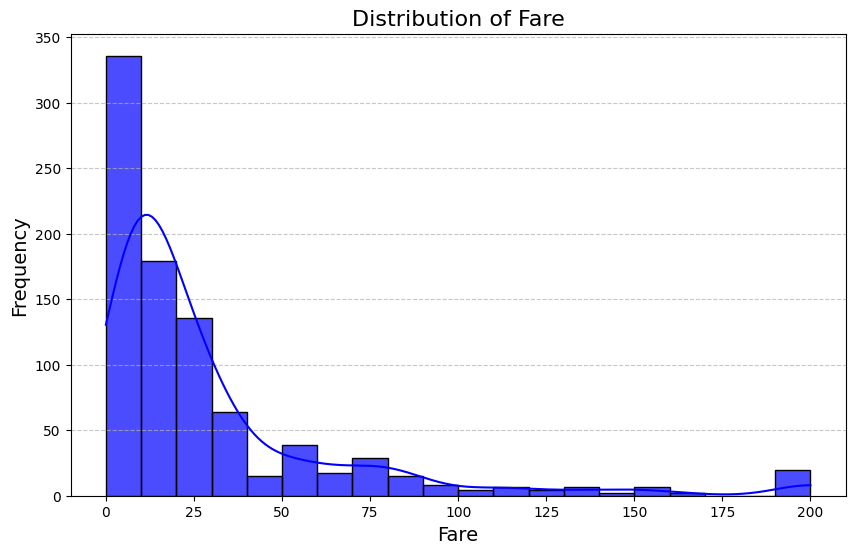

In [ ]:
# Plot the distribution of "Fare"
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Fare', fontsize=16)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Apply log scaling to the "Fare" feature
df['Fare'] = np.log1p(df['Fare'])

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,2.955843
std,0.486592,0.836071,14.526497,1.102743,0.806057,0.951493
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,2.187218
50%,0.000000,3.000000,28.000000,0.000000,0.000000,2.737881
75%,1.000000,3.000000,38.000000,1.000000,0.000000,3.465736
max,1.000000,3.000000,80.000000,8.000000,6.000000,5.303305


In [ ]:
df["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
df.loc[df['Parch'] > 2, 'Parch'] = 2

In [ ]:
df["Parch"].value_counts()

,count
Parch,
0,678
1,118
2,95


In [ ]:
df["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df.loc[df['SibSp'] > 2, 'SibSp'] = 2

In [ ]:
df["SibSp"].value_counts()

,count
SibSp,
0,608
1,209
2,74


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.400673,0.345679,2.955843
std,0.486592,0.836071,14.526497,0.637727,0.663266,0.951493
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,2.187218
50%,0.000000,3.000000,28.000000,0.000000,0.000000,2.737881
75%,1.000000,3.000000,38.000000,1.000000,0.000000,3.465736
max,1.000000,3.000000,80.000000,2.000000,2.000000,5.303305


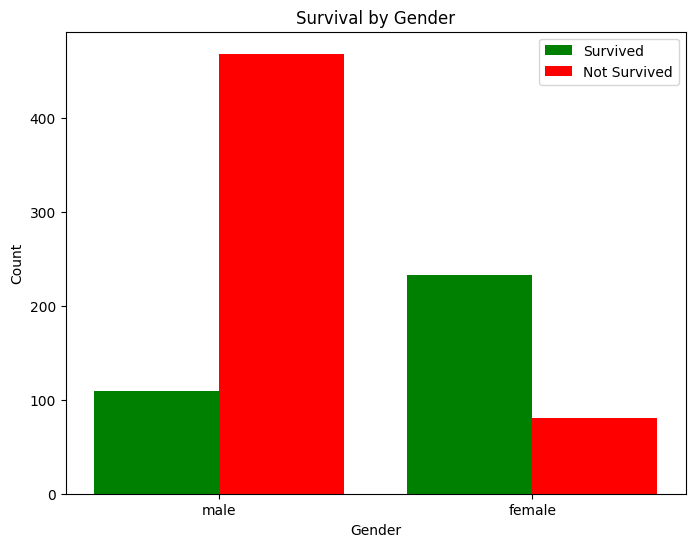

In [ ]:
# Count the occurrences of each group
group_counts = df.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Extract data for plotting
male_survived = group_counts.loc['male', 1]
male_not_survived = group_counts.loc['male', 0]
female_survived = group_counts.loc['female', 1]
female_not_survived = group_counts.loc['female', 0]

# Labels and values
labels = ['male', 'female']
survived_counts = [male_survived, female_survived]
not_survived_counts = [male_not_survived, female_not_survived]

# Plotting
x = range(len(labels))  # [0, 1] for 'Male' and 'Female'
width = 0.4

plt.figure(figsize=(8, 6))

# Bar plots for survived and not survived
plt.bar(x, survived_counts, width, label='Survived', color='green')
plt.bar([p + width for p in x], not_survived_counts, width, label='Not Survived', color='red')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.xticks([p + width / 2 for p in x], labels)  # Center the x-ticks
plt.legend()

# Display the plot
plt.show()

<ipython-input-38-2845ec82a590>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Not Survived', shade=True, color='red')
<ipython-input-38-2845ec82a590>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', shade=True, color='green')


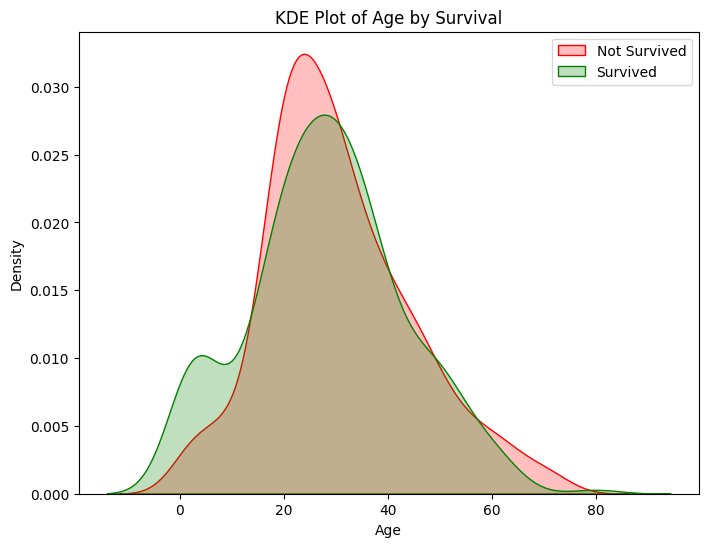

In [ ]:
# KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Survived'] == 0], x='Age', label='Not Survived', shade=True, color='red')
sns.kdeplot(data=df[df['Survived'] == 1], x='Age', label='Survived', shade=True, color='green')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age by Survival')
plt.legend()
plt.show()

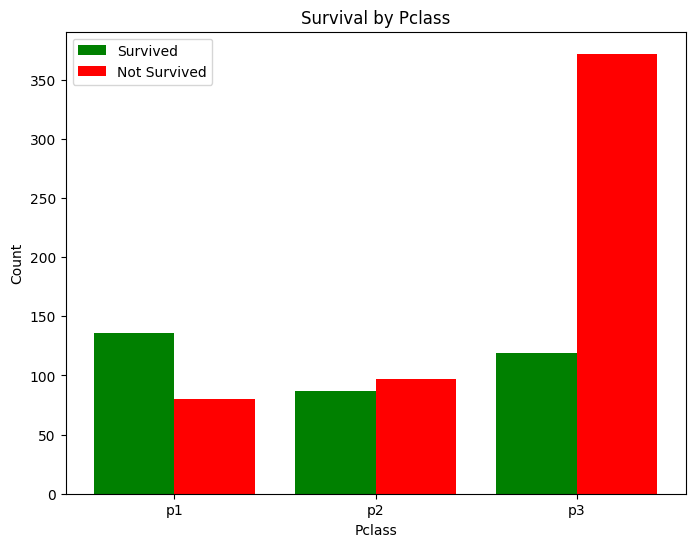

In [ ]:
# Count the occurrences of each group
group_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Extract data for plotting
p1_survived = group_counts.loc[1, 1]
p1_not_survived = group_counts.loc[1, 0]
p2_survived = group_counts.loc[2, 1]
p2_not_survived = group_counts.loc[2, 0]
p3_survived = group_counts.loc[3, 1]
p3_not_survived = group_counts.loc[3, 0]

# Labels and values
labels = ['p1', 'p2', 'p3']
survived_counts = [p1_survived, p2_survived, p3_survived]
not_survived_counts = [p1_not_survived, p2_not_survived, p3_not_survived]

# Plotting
x = range(len(labels))  # [0, 1] for 'Male' and 'Female'
width = 0.4

plt.figure(figsize=(8, 6))

# Bar plots for survived and not survived
plt.bar(x, survived_counts, width, label='Survived', color='green')
plt.bar([p + width for p in x], not_survived_counts, width, label='Not Survived', color='red')

# Adding labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival by Pclass')
plt.xticks([p + width / 2 for p in x], labels)  # Center the x-ticks
plt.legend()

# Display the plot
plt.show()

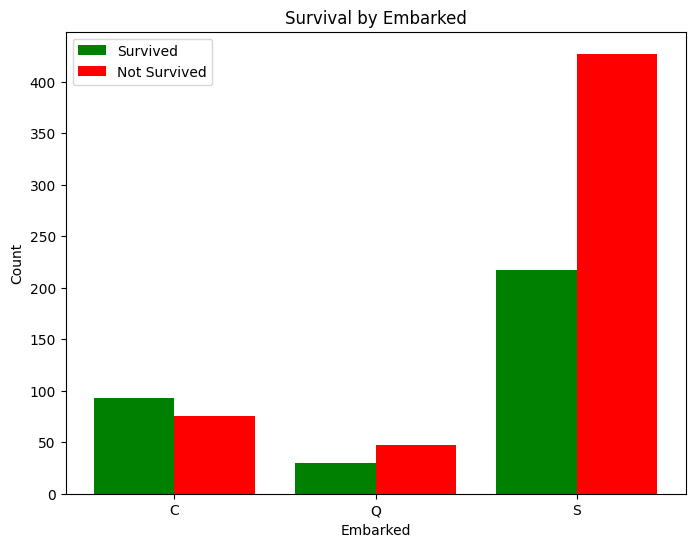

In [ ]:
# Count the occurrences of each group
group_counts = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Extract data for plotting
c_survived = group_counts.loc['C', 1]
c_not_survived = group_counts.loc['C', 0]
q_survived = group_counts.loc['Q', 1]
q_not_survived = group_counts.loc['Q', 0]
s_survived = group_counts.loc['S', 1]
s_not_survived = group_counts.loc['S', 0]

# Labels and values
labels = ['C', 'Q', 'S']
survived_counts = [c_survived, q_survived, s_survived]
not_survived_counts = [c_not_survived, q_not_survived, s_not_survived]

# Plotting
x = range(len(labels))  # [0, 1] for 'Male' and 'Female'
width = 0.4

plt.figure(figsize=(8, 6))

# Bar plots for survived and not survived
plt.bar(x, survived_counts, width, label='Survived', color='green')
plt.bar([p + width for p in x], not_survived_counts, width, label='Not Survived', color='red')

# Adding labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival by Embarked')
plt.xticks([p + width / 2 for p in x], labels)  # Center the x-ticks
plt.legend()

# Display the plot
plt.show()

In [ ]:
df = df.drop(columns=['Embarked', 'Ticket'])

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,2.110213
1,1,1,female,38.0,1,0,4.280593
2,1,3,female,26.0,0,0,2.188856
3,1,1,female,35.0,1,0,3.990834
4,0,3,male,35.0,0,0,2.202765
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,2.639057
887,1,1,female,19.0,0,0,3.433987
888,0,3,female,NaN,1,2,3.196630
889,1,1,male,26.0,0,0,3.433987


In [ ]:
df['Sex'] = df['Sex'].map({'male': False, 'female': True})

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,False,22.0,1,0,2.110213
1,1,1,True,38.0,1,0,4.280593
2,1,3,True,26.0,0,0,2.188856
3,1,1,True,35.0,1,0,3.990834
4,0,3,False,35.0,0,0,2.202765
...,...,...,...,...,...,...,...
886,0,2,False,27.0,0,0,2.639057
887,1,1,True,19.0,0,0,3.433987
888,0,3,True,NaN,1,2,3.196630
889,1,1,False,26.0,0,0,3.433987


In [ ]:
df['Age'].isna().sum()

177

In [ ]:
# Calculate the median of the "Age" column, ignoring missing values
age_median = df['Age'].median()

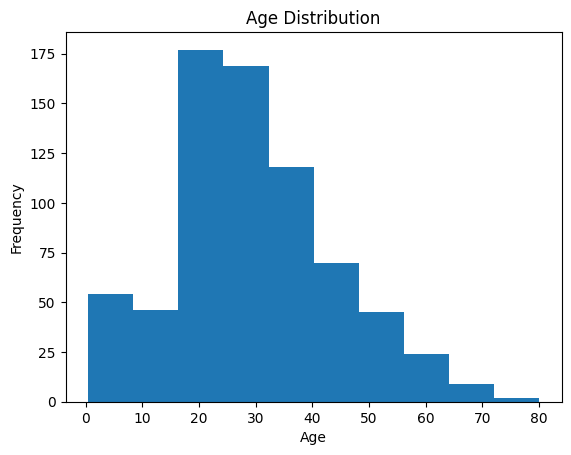

In [ ]:
# Plot histogram of the "Age" column
plt.hist(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

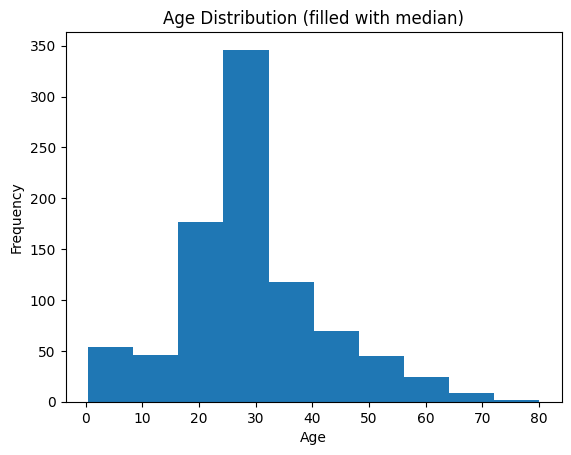

In [ ]:
# Plot histogram of the "Age" column
plt.hist(df['Age'].fillna(age_median))
plt.title('Age Distribution (filled with median)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Replace missing "Age" values with the mean
df['Age'] = df['Age'].fillna(age_median)

In [ ]:
# Apply quantile-based bucketing to the "Age" feature
# Divide the data into 4 quantile-based buckets
df['Age'] = pd.qcut(df['Age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Display the updated DataFrame
print("DataFrame with Quantile-Based Buckets:")
print(df)

DataFrame with Quantile-Based Buckets:
     Survived  Pclass    Sex Age  SibSp  Parch      Fare
0           0       3  False  Q1      1      0  2.110213
1           1       1   True  Q4      1      0  4.280593
2           1       3   True  Q2      0      0  2.188856
3           1       1   True  Q3      1      0  3.990834
4           0       3  False  Q3      0      0  2.202765
..        ...     ...    ...  ..    ...    ...       ...
886         0       2  False  Q2      0      0  2.639057
887         1       1   True  Q1      0      0  3.433987
888         0       3   True  Q2      1      2  3.196630
889         1       1  False  Q2      0      0  3.433987
890         0       3  False  Q3      0      0  2.169054

[891 rows x 7 columns]


In [ ]:
# Convert "Pclass" column to one-hot encoding
one_hot_pclass = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
one_hot_age = pd.get_dummies(df['Age'], prefix='Age', drop_first=True)
one_hot_sibsp = pd.get_dummies(df['SibSp'], prefix='SibSp', drop_first=True)
one_hot_parch = pd.get_dummies(df['Parch'], prefix='Parch', drop_first=True)

In [ ]:
one_hot_vectors = [one_hot_pclass, one_hot_age, one_hot_sibsp, one_hot_parch]

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,False,Q1,1,0,2.110213
1,1,1,True,Q4,1,0,4.280593
2,1,3,True,Q2,0,0,2.188856
3,1,1,True,Q3,1,0,3.990834
4,0,3,False,Q3,0,0,2.202765
...,...,...,...,...,...,...,...
886,0,2,False,Q2,0,0,2.639057
887,1,1,True,Q1,0,0,3.433987
888,0,3,True,Q2,1,2,3.196630
889,1,1,False,Q2,0,0,3.433987


In [ ]:
# Concatenate the one-hot encoded columns back to the original DataFrame
# df = pd.concat([df, one_hot_pclass, one_hot_age, one_hot_sibsp, one_hot_parch], axis=1)
df = pd.concat([df, *one_hot_vectors], axis=1)
df = df.drop(columns=['Pclass', 'Age', 'SibSp', 'Parch'])

In [ ]:
df

,Survived,Sex,Fare,Pclass_2,Pclass_3,Age_Q2,Age_Q3,Age_Q4,SibSp_1,SibSp_2,Parch_1,Parch_2
0,0,False,2.110213,False,True,False,False,False,True,False,False,False
1,1,True,4.280593,False,False,False,False,True,True,False,False,False
2,1,True,2.188856,False,True,True,False,False,False,False,False,False
3,1,True,3.990834,False,False,False,True,False,True,False,False,False
4,0,False,2.202765,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,False,2.639057,True,False,True,False,False,False,False,False,False
887,1,True,3.433987,False,False,False,False,False,False,False,False,False
888,0,True,3.196630,False,True,True,False,False,True,False,False,True
889,1,False,3.433987,False,False,True,False,False,False,False,False,False


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
X

,Sex,Fare,Pclass_2,Pclass_3,Age_Q2,Age_Q3,Age_Q4,SibSp_1,SibSp_2,Parch_1,Parch_2
0,False,2.110213,False,True,False,False,False,True,False,False,False
1,True,4.280593,False,False,False,False,True,True,False,False,False
2,True,2.188856,False,True,True,False,False,False,False,False,False
3,True,3.990834,False,False,False,True,False,True,False,False,False
4,False,2.202765,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,2.639057,True,False,True,False,False,False,False,False,False
887,True,3.433987,False,False,False,False,False,False,False,False,False
888,True,3.196630,False,True,True,False,False,True,False,False,True
889,False,3.433987,False,False,True,False,False,False,False,False,False


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class TitanicDataset(Dataset):
    def __init__(self, csv_file_path):
        self.df = self.clean_df(csv_file_path)
        self.features = self.df.drop(columns='Survived')
        self.labels = self.df['Survived']

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        samp_features = torch.tensor(self.features.iloc[idx].tolist(), dtype=torch.float32)
        samp_label = torch.tensor(self.labels.iloc[idx].tolist(), dtype=torch.float32).view(-1)
        return samp_features, samp_label

    def clean_df(self, csv_file_path):
        cleaned_df = pd.read_csv(csv_file_path)
        cleaned_df = self.drop_cols(cleaned_df)
        cleaned_df = self.clean_fare_feature(cleaned_df)
        cleaned_df = self.clean_parch_feature(cleaned_df)
        cleaned_df = self.clean_sibsp_feature(cleaned_df)
        cleaned_df = self.clean_age_feature(cleaned_df)
        cleaned_df = self.clean_sex_feature(cleaned_df)
        cate_features = ['Pclass', 'Age', 'SibSp', 'Parch']
        cleaned_df = self.create_one_hot_vectors(cleaned_df, cate_features)
        return cleaned_df

    def drop_cols(self, df):
        df = df.drop(columns=['PassengerId', 'Name','Cabin', 'Embarked', 'Ticket'])
        return df

    def clean_fare_feature(self, df):
        # Clipping Fare feature + Log scaling
        df.loc[df['Fare'] > 200, 'Fare'] = 200
        df['Fare'] = np.log1p(df['Fare'])
        return df

    def clean_parch_feature(self, df):
        # Clipping Parch feature
        df.loc[df['Parch'] > 2, 'Parch'] = 2
        return df

    def clean_sibsp_feature(self, df):
        # Clipping SibSp feature
        df.loc[df['SibSp'] > 2, 'SibSp'] = 2
        return df

    def clean_sex_feature(self, df):
        # Categorize Sex feature
        df['Sex'] = df['Sex'].map({'male': False, 'female': True})
        return df

    def clean_age_feature(self, df):
        # Replace missing "Age" values with the mean
        # Calculate the median of the "Age" column, ignoring missing values
        age_median = df['Age'].median()
        self.age_median = age_median
        df['Age'] = df['Age'].fillna(age_median)
        df['Age'] = pd.qcut(df['Age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        return df

    def create_one_hot_vectors(self, df, feature_names):
        # Create one-hot vectors from categorical features
        one_hot_vectors = [pd.get_dummies(df[feature_name], prefix=feature_name, drop_first=True) for feature_name in feature_names]
        df = pd.concat([df, *one_hot_vectors], axis=1)
        df = df.drop(columns=feature_names)
        return df

In [ ]:
train_path

'/root/.cache/kagglehub/competitions/titanic/train.csv'

In [ ]:
train_df = pd.read_csv(train_path)
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
train_df_splitted = pd.concat([X_train, y_train], axis=1)
train_df_splitted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
733,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
382,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
704,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
813,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
270,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
435,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


In [ ]:
train_splitted_path = train_path.replace("train.csv", "train_splitted.csv")
val_splitted_path = train_path.replace("train.csv", "val_splitted.csv")

In [ ]:
train_df_splitted.to_csv(train_splitted_path, index=False)

In [ ]:
val_df_splitted = pd.concat([X_val, y_val], axis=1)
val_df_splitted

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...
433,434,3,"Kallio, Mr. Nikolai Erland",male,17.0,0,0,STON/O 2. 3101274,7.1250,NaN,S,0
773,774,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C,0
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1
84,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S,1


In [ ]:
val_df_splitted.to_csv(val_splitted_path, index=False)

In [ ]:
training_dataset = TitanicDataset(train_splitted_path)
training_dataset.df

,Sex,Fare,Survived,Pclass_2,Pclass_3,Age_Q2,Age_Q3,Age_Q4,SibSp_1,SibSp_2,Parch_1,Parch_2
0,False,3.384390,0,False,False,False,False,True,False,False,False,False
1,False,2.639057,0,True,False,True,False,False,False,False,False,False
2,False,2.188856,0,False,True,False,True,False,False,False,False,False
3,False,2.180892,0,False,True,True,False,False,True,False,False,False
4,True,3.474293,0,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
707,True,2.157559,1,False,True,False,False,False,False,False,False,False
708,False,3.465736,0,False,False,True,False,False,False,False,False,False
709,False,2.715244,0,False,True,False,False,True,False,True,False,False
710,True,4.795791,1,False,False,False,False,False,True,False,False,True


In [ ]:
training_dataset.age_median

28.0

In [ ]:
val_dataset = TitanicDataset(val_splitted_path)

In [ ]:
val_dataset.df

,Sex,Fare,Survived,Pclass_2,Pclass_3,Age_Q2,Age_Q3,Age_Q4,SibSp_1,SibSp_2,Parch_1,Parch_2
0,False,2.787834,1,False,True,True,False,False,True,False,True,False
1,False,2.442347,0,True,False,False,True,False,False,False,False,False
2,False,2.188856,0,False,True,False,False,False,False,False,False,False
3,True,3.526361,1,True,False,False,False,False,False,False,True,False
4,True,2.504848,1,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
174,False,2.094946,0,False,True,False,False,False,False,False,False,False
175,False,2.107178,0,False,True,True,False,False,False,False,False,False
176,True,3.477773,1,False,True,False,False,True,True,False,False,True
177,True,2.442347,1,True,False,False,False,False,False,False,False,False


In [ ]:
val_dataset.age_median

29.0

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(training_dataset, shuffle=True)
val_dataloader = DataLoader(val_dataset, shuffle=True)

# Model development

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# create model instance
bst = XGBClassifier(n_estimators=3, max_depth=2, learning_rate=1e-3, objective='binary:logistic')

## PyTorch Neural Networks

In [ ]:
import torch
from torch import nn

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
feature_size = training_dataset.df.shape[1] - 1
model = NeuralNetwork(feature_size).to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=11, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=32, out_features=1, bias=True)
    (9): Sigmoid()
  )
)


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Model Training

## PyTorch Neural Network

In [ ]:
learning_rate = 1e-4
epochs = 100

In [ ]:
# Initialize the loss function
loss_fn = nn.BCELoss().to(device)

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)  # RMSProp optimizer

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.cuda())
        loss = loss_fn(pred.cuda(), y.cuda())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss, current = loss.item(), batch * batch_size + len(X.cuda())
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def val_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    val_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.cuda())
            val_loss += loss_fn(pred.cuda(), y.cuda()).item()
            correct += (pred.argmax(1) == y.cuda()).type(torch.float).sum().item()

    val_loss /= num_batches
    correct /= size
    print(f"Val Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {val_loss:>8f} \n")

In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    val_loop(val_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.727957  [   64/  712]
loss: 0.722990  [  128/  712]
loss: 0.733234  [  192/  712]
loss: 0.723673  [  256/  712]
loss: 0.717959  [  320/  712]
loss: 0.709264  [  384/  712]
loss: 0.724472  [  448/  712]
loss: 0.728537  [  512/  712]
loss: 0.725786  [  576/  712]
loss: 0.715368  [  640/  712]
loss: 0.714856  [  704/  712]
loss: 0.771458  [  712/  712]
Val Error: 
 Accuracy: 3678.8%, Avg loss: 0.713051 

Epoch 2
-------------------------------
loss: 0.723100  [   64/  712]
loss: 0.713931  [  128/  712]
loss: 0.729436  [  192/  712]
loss: 0.720011  [  256/  712]
loss: 0.717259  [  320/  712]
loss: 0.719337  [  384/  712]
loss: 0.706056  [  448/  712]
loss: 0.718761  [  512/  712]
loss: 0.710345  [  576/  712]
loss: 0.710051  [  640/  712]
loss: 0.718724  [  704/  712]
loss: 0.744948  [  712/  712]
Val Error: 
 Accuracy: 3678.8%, Avg loss: 0.710481 

Epoch 3
-------------------------------
loss: 0.709412  [   64/  712]
loss: 0.701190  [  128/ 

## XGBoost

In [ ]:
X_train = training_dataset.df.drop(columns=['Survived'])
y_train = training_dataset.df['Survived']

In [ ]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Random Forest

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, precision_recall_curve

X_val = val_dataset.df.drop(columns=['Survived'])
y_val = val_dataset.df['Survived']

## XGBoost

In [ ]:
y_pred = bst.predict(X_val)

In [ ]:
acc = accuracy_score(y_true=y_val, y_pred=y_pred)
print("Accuracy:", acc)

Accuracy: 0.5865921787709497


## Random Forest

In [ ]:
y_pred = rf.predict(X_val)

In [ ]:
acc = accuracy_score(y_true=y_val, y_pred=y_pred)
print("Accuracy:", acc)

Accuracy: 0.8044692737430168
